# Javaria Ahmad 3001059

In this project, data visualizations were performed on global terrorism data fetched from Kaggle.com. The dataset source is https://www.kaggle.com/START-UMD/gtd. The dataset was too large to upload under the data folder.

One of the resources used was pluralsight.com.



In [1]:
# imports

import numpy as np
import pandas as pd
import os

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as offline
import plotly.tools as tls
import matplotlib
import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.mplot3d import Axes3D
import random

Loading useful columns from the dataset into pandas dataframe and displaying first five rows. The data has terrorism records from 1970 to 2017. Some of the prominent fields provided are country and city of crime. Also, data is given about the attack type and nationality of attackers.

In [2]:

df_terrdata=pd.read_csv('../data/raw/globalterrorismdata.csv', encoding = "ISO-8859-1", usecols=[1,2,3,5,7,8,9,10,11,12,26,28,29,34,35,40,41])
df_terrdata.head()

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,success,attacktype1,attacktype1_txt,targtype1,targtype1_txt,natlty1,natlty1_txt
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,1,1,Assassination,14,Private Citizens & Property,58.0,Dominican Republic
1,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,1,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),21.0,Belgium
2,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,1,1,Assassination,10,Journalists & Media,217.0,United States
3,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,1,3,Bombing/Explosion,7,Government (Diplomatic),217.0,United States
4,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,1,7,Facility/Infrastructure Attack,7,Government (Diplomatic),217.0,United States


Replace missing data values with NaN and drop rows with NaN values.

In [3]:
df_terrdata = df_terrdata.replace('?', np.nan)
df_terrdata = df_terrdata.dropna()


Generating a chart to show the number of terrorism activities globally per year. On x-axis, there is year and on y-axis, there is count of global terrorism instances. These activities have significantly increased since 2005 and skyrocketed close to about 2015.

Text(0.5, 1.0, 'Count of global crimes per year from 1970 to 2017\n')

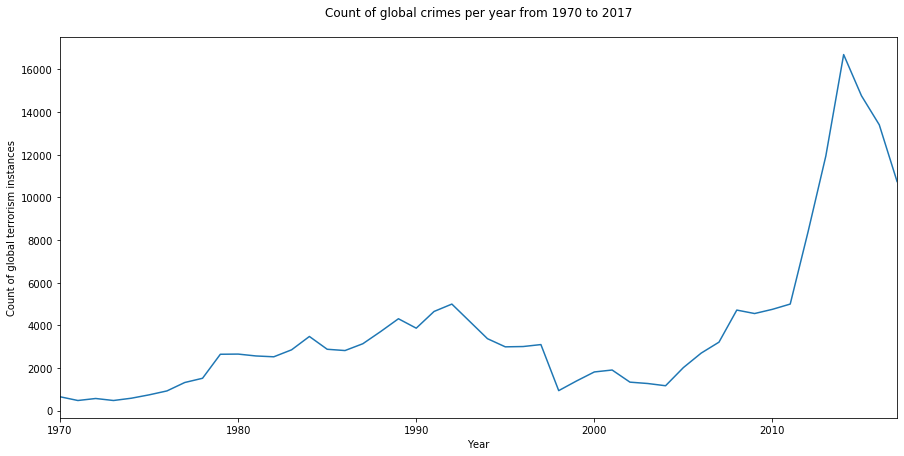

In [4]:
fig, ax = plt.subplots(figsize=(15,7))
df_terrdata.groupby(['iyear'])['iyear'].count().plot(ax=ax)
ax.set_ylabel('Count of global terrorism instances')
ax.set_xlabel('Year')
ax.set_title('Count of global crimes per year from 1970 to 2017\n')

Getting top 10 countries of highest terrorism activity numbers over 47 years (from 1970 and 2017). Iraq has the highest terrorism activity.

In [5]:
data = df_terrdata.groupby(['country_txt'])['country_txt'].count()
data = data.nlargest(10,keep='last')
data

country_txt
Iraq              24591
Pakistan          14294
India             11934
Afghanistan       11860
Colombia           8280
Philippines        6896
Peru               6074
El Salvador        5300
United Kingdom     5216
Turkey             4271
Name: country_txt, dtype: int64

Bar plot is generated to visualize the data above. Among top 10 countries, Iraq had the highest number and Turkey had the lowest number of terrorist activities and over 47 years.


Text(0.5, 1.0, 'Count of crimes per country from 1970 to 2017\n')

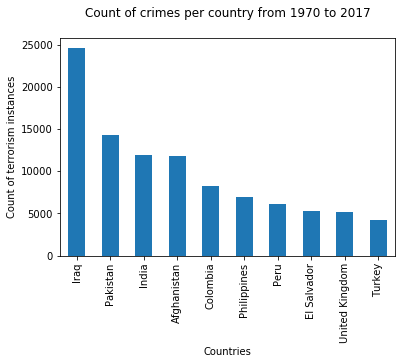

In [6]:
ax=data.plot.bar()
ax.set_ylabel('Count of terrorism instances')
ax.set_xlabel('Countries')
ax.set_title('Count of crimes per country from 1970 to 2017\n')


2015 is interesting in that global terrorism went up significantly then. Getting top 10 countries of highest terrorism in 2015 when the overall global crime rate skyrocketed. Countries are displayed below with the number of terrorist activites in 2015.

In [7]:
data = df_terrdata[df_terrdata['iyear'] == 2015].groupby('country_txt')['country_txt'].count()
data = data.nlargest(10,keep='last')
data

country_txt
Iraq           2751
Afghanistan    1791
Pakistan       1243
India           884
Philippines     721
Yemen           663
Egypt           647
Ukraine         637
Nigeria         637
Libya           543
Name: country_txt, dtype: int64

Getting top 10 countries of highest terrorism in 2015 by the country code.

In [8]:
datacode = df_terrdata[df_terrdata['iyear'] == 2015].groupby('country')['country'].count()
datacode = datacode.nlargest(10,keep='last')
datacode

country
95     2751
4      1791
153    1243
92      884
160     721
228     663
60      647
214     637
147     637
113     543
Name: country, dtype: int64

Visualizing top 10 highest terrorism countries from 2015 using scatter plot below. Countries are on the x-axis and count of terrorism instances is on the y-axis. Iraq has the highest count and Libya has the lowest count amount top 10 countries from 2015.

Text(0.5, 1.0, 'Top 10 countries of highest terrorism in 2015')

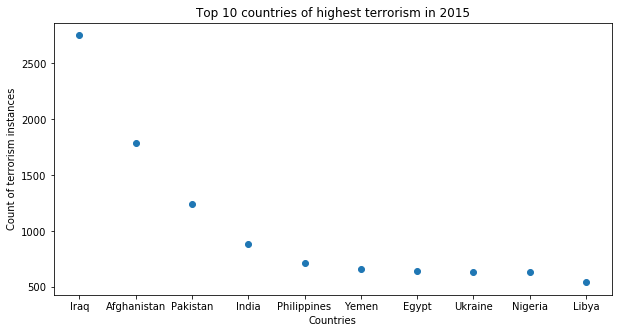

In [9]:
plt.figure(figsize=(10, 5))
plt.scatter(data.index, data)

plt.xlabel('Countries')
plt.ylabel('Count of terrorism instances')
plt.title('Top 10 countries of highest terrorism in 2015')


For top 10 countries of 2015, getting the data for 2016 and 2017 to see the trend for these countries over three consecutive years.

In [10]:
data = df_terrdata[df_terrdata['iyear'] > 2014].groupby(['country_txt','iyear'])['country_txt'].count().unstack()
data = data.nlargest(10, 2015 ,keep='last')
data


iyear,2015,2016,2017
country_txt,,,
Iraq,2751.0,3359.0,2466.0
Afghanistan,1791.0,1472.0,1294.0
Pakistan,1243.0,864.0,719.0
India,884.0,1025.0,966.0
Philippines,721.0,631.0,692.0
Yemen,663.0,525.0,226.0
Egypt,647.0,376.0,224.0
Ukraine,637.0,61.0,61.0
Nigeria,637.0,533.0,484.0


For top 10 countries of 2015, getting the data for 2016 and 2017 to see the trend for these countries over three consecutive years, now using country code.

In [11]:
datacode = df_terrdata[df_terrdata['iyear'] > 2014].groupby(['country','iyear'])['country'].count().unstack()#.plot.bar()
datacode = datacode.nlargest(10, 2015 ,keep='last')
datacode

iyear,2015,2016,2017
country,,,
95,2751.0,3359.0,2466.0
4,1791.0,1472.0,1294.0
153,1243.0,864.0,719.0
92,884.0,1025.0,966.0
160,721.0,631.0,692.0
228,663.0,525.0,226.0
60,647.0,376.0,224.0
214,637.0,61.0,61.0
147,637.0,533.0,484.0


Visualizing the data over 3 years (2015, 2016, 2017) for countries that were top 10 in 2015 for crimes.

It seems that for almost all the countries, crimes were higher in 2015 (blue line) as compared to 2017 (green line). These countries seem to be improving on controlling the terrorism rate.


Text(0.5, 1.0, 'Trend of crimes per country in 2015, 2016, 2017\n')

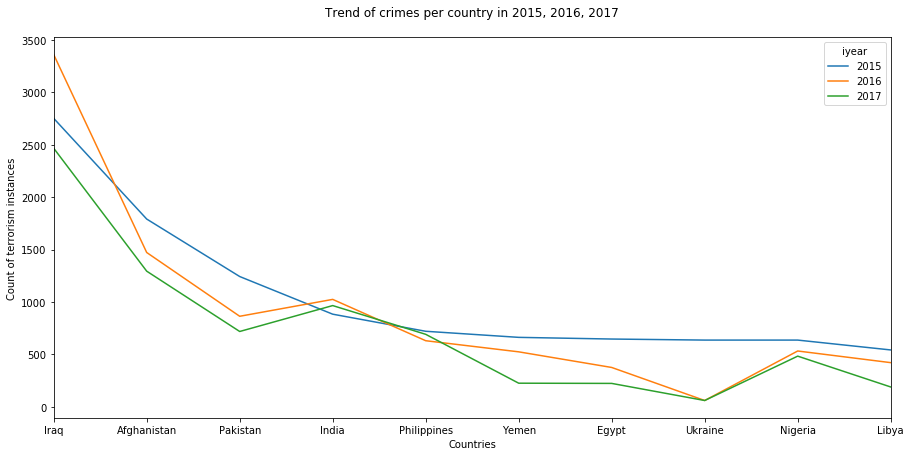

In [12]:
fig, ax = plt.subplots(figsize=(15,7))
data.plot(ax=ax)
ax.set_ylabel('Count of terrorism instances')
ax.set_xlabel('Countries')
ax.set_title('Trend of crimes per country in 2015, 2016, 2017\n')

Creating dataframes for series data above about year, terrorism count and country. Then populating the dataframe from the series data. Dataframes were created using both country text and country code.

In [13]:
col_names =  ['year', 'count', 'country']
my_df  = pd.DataFrame(columns = col_names)
my_dfcode  = pd.DataFrame(columns = col_names)


In [14]:
# Populate dataframe from series. This dataframe has country text

j=0
k=0
for j in range (int((data.size/3))):
    for i, v in data.items():
        my_df.loc[k] = [i, int(v[j]), data.index[j]]
        k=k+1

In [15]:
# Populate dataframe from series. This dataframe has country code

j=0
k=0
for j in range (int((datacode.size/3))):
    for i, v in data.items():
        my_dfcode.loc[k] = [i, int(v[j]), datacode.index[j]]
        k=k+1

Printing the dataframe with top 10 countries from 2015 with their terrorism rate in 2016 and 2017.

In [16]:
my_df

,year,count,country
0,2015,2751,Iraq
1,2016,3359,Iraq
2,2017,2466,Iraq
3,2015,1791,Afghanistan
4,2016,1472,Afghanistan
5,2017,1294,Afghanistan
6,2015,1243,Pakistan
7,2016,864,Pakistan
8,2017,719,Pakistan
9,2015,884,India


Obtaining the same data with country code instead of country text.

In [17]:
my_dfcode

,year,count,country
0,2015,2751,95
1,2016,3359,95
2,2017,2466,95
3,2015,1791,4
4,2016,1472,4
5,2017,1294,4
6,2015,1243,153
7,2016,864,153
8,2017,719,153
9,2015,884,92


Creating dataframes per country (2015, 2016, 2017) for 10 highest terrorism countries from 2015.

In [18]:
my_df2015 = my_dfcode.loc[my_dfcode.year == 2015]
my_df2016 = my_dfcode.loc[my_dfcode.year == 2016]
my_df2017 = my_dfcode.loc[my_dfcode.year == 2017]

Creating 3D scatter plot to analyze terrorism in 2015, 2016, 2017 for the countries that were 10 highest in 2015 for terrorism.

The scatter plot shows that these countries continue to decrease in terrorism over the next few years.
2015 data (red dots) show high terrorism than 2017 data (green dots).



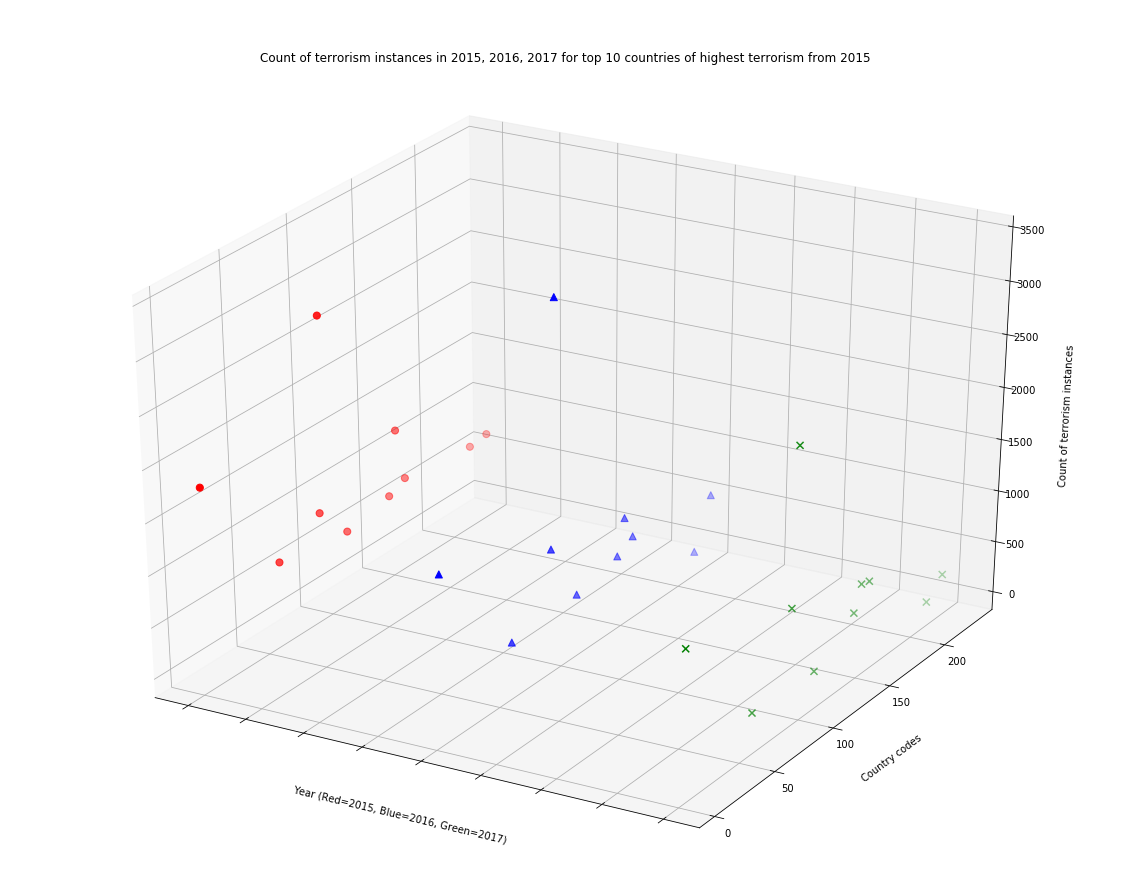

In [19]:

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

xs =my_df2015['year'].tolist() # Year
ys =my_df2015['country'].tolist() # Countries
zs =my_df2015['count'].tolist() # Number of crimes

xt =my_df2016['year'].tolist() # Year
yt =my_df2016['country'].tolist() # Countries
zt =my_df2016['count'].tolist() # Number of crimes

xu =my_df2017['year'].tolist() # Year
yu =my_df2017['country'].tolist() # Countries
zu =my_df2017['count'].tolist() # Number of crimes

ax.scatter(xs, ys, zs, s=50, c='r', marker='o')
ax.scatter(xt, yt, zt, s=50, c='b', marker='^')
ax.scatter(xu, yu, zu, s=50, c='g', marker='x')

ax.set_xlabel('\n\n\n\nYear (Red=2015, Blue=2016, Green=2017)')
ax.set_ylabel('\n\n\n\nCountry codes')
ax.set_zlabel('\n\n\n\nCount of terrorism instances')
ax.set_title('\n\n\nCount of terrorism instances in 2015, 2016, 2017 for top 10 countries of highest terrorism from 2015\n\n\n\n')

ax.set_xticklabels([])

plt.show()

Globally, over 47 years, bombing has been the most common type of terrorism activity. The pie chart depicts this below.

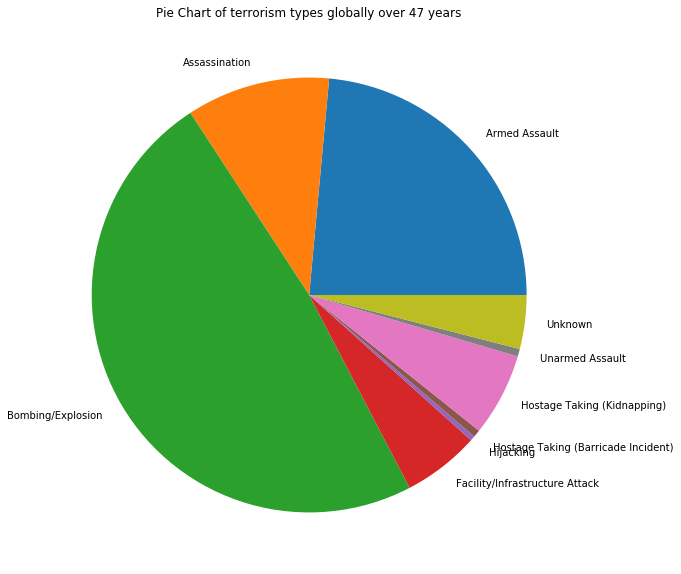

In [20]:
dftype = df_terrdata.groupby('attacktype1_txt').size()

dftype.plot(kind='pie', subplots=True, figsize=(10, 10))
plt.title("Pie Chart of terrorism types globally over 47 years")
plt.ylabel("")
plt.show()


Analyzing the number of terrorism types in United States over the years from 1970 to 2017 and then creating dataframe from this data. The dataframe will be used in further analysis.

In [21]:
terrdata = df_terrdata[df_terrdata['country_txt'] == 'United States'].groupby(['attacktype1_txt','iyear'])['attacktype1_txt'].count().unstack()
terrdata

iyear,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
attacktype1_txt,,,,,,,,,,,,,,,,,,,,,
Armed Assault,28.0,21.0,3.0,22.0,14.0,3.0,8.0,8.0,8.0,10.0,...,2.0,7.0,1.0,3.0,3.0,3.0,18.0,12.0,17.0,31.0
Assassination,8.0,4.0,8.0,8.0,3.0,8.0,7.0,8.0,4.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
Bombing/Explosion,275.0,143.0,36.0,19.0,63.0,130.0,74.0,80.0,58.0,42.0,...,2.0,2.0,3.0,3.0,2.0,6.0,5.0,6.0,8.0,5.0
Facility/Infrastructure Attack,149.0,75.0,15.0,4.0,10.0,4.0,12.0,28.0,12.0,5.0,...,12.0,2.0,11.0,3.0,15.0,7.0,5.0,16.0,35.0,21.0
Hijacking,2.0,1.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Hostage Taking (Barricade Incident),NaN,1.0,2.0,2.0,NaN,2.0,NaN,5.0,4.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,1.0,1.0
Hostage Taking (Kidnapping),1.0,1.0,1.0,3.0,1.0,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
Unarmed Assault,2.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,...,2.0,NaN,1.0,NaN,NaN,3.0,1.0,2.0,1.0,3.0
Unknown,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Creating dataframe from the above data

col_names =  ['year', 'terrtype', 'count']
df_terrtype = pd.DataFrame(columns = col_names)


j=0
k=0
for j in range (int((terrdata.size/47))):
    for i, v in terrdata.items():
        df_terrtype.loc[k] = [i, terrdata.index[j], v[j]]
        k=k+1
        
df_terrtype.head()

,year,terrtype,count
0,1970,Armed Assault,28.0
1,1971,Armed Assault,21.0
2,1972,Armed Assault,3.0
3,1973,Armed Assault,22.0
4,1974,Armed Assault,14.0


Fetch the assault type data in US from 1970 and 2017. In US, it is interesting to analyze the assault type due to current political debates on fire arms.

In [23]:
df_terrtype1970 = df_terrtype.loc[df_terrtype.year == 1970]
df_terrtype2017 = df_terrtype.loc[df_terrtype.year == 2017]

In [24]:
df_terrtype1970 = df_terrtype1970.dropna()
df_terrtype2017 = df_terrtype2017.dropna()

df_terrtype1970

,year,terrtype,count
0,1970,Armed Assault,28.0
47,1970,Assassination,8.0
94,1970,Bombing/Explosion,275.0
141,1970,Facility/Infrastructure Attack,149.0
188,1970,Hijacking,2.0
282,1970,Hostage Taking (Kidnapping),1.0
329,1970,Unarmed Assault,2.0


Creating pie chart of terrorism types in US in 1970. Bombing is most common. Armed assault is less common.

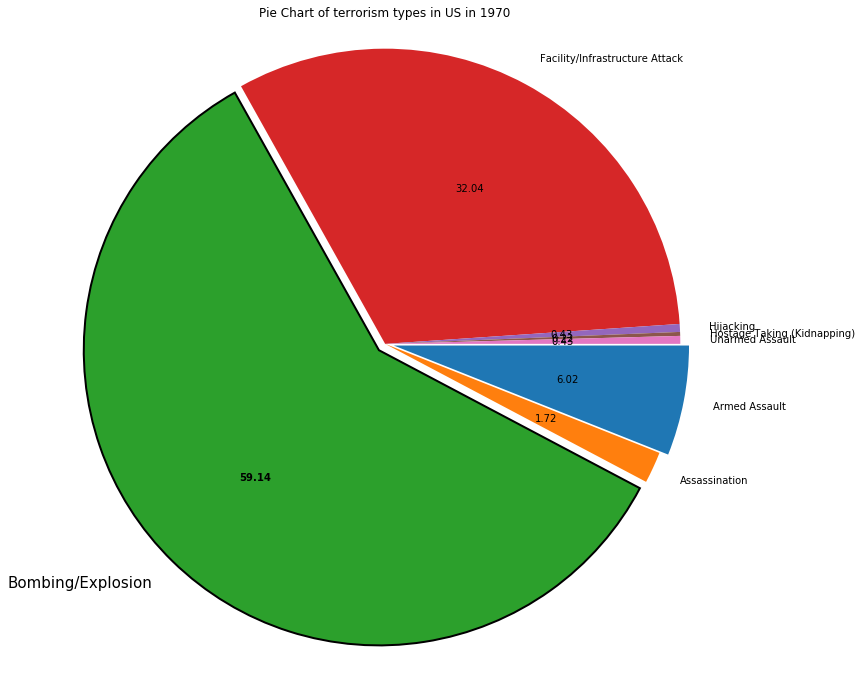

In [26]:
fig1, ax1 = plt.subplots(figsize=(12, 12))
explode=(0.03,0,0.03,0,0,0,0)
wedges, texts, autotexts = plt.pie(df_terrtype1970['count'],
       labels=df_terrtype1970['terrtype'],
       autopct = '%.2f',
       explode=explode,
       counterclock=False)
plt.axis('equal')

wedges[2].set(edgecolor='black', linewidth=2)
texts[2].set(family='cursive', size=15)
autotexts[2].set(weight='bold', size=10)
plt.title("Pie Chart of terrorism types in US in 1970")
plt.show()

Pie chart of terrorism types in US in 2017. Armed assault is most common. Guns seem to be less controlled now as it is already expected. Bombing went to be the less common assault type now.

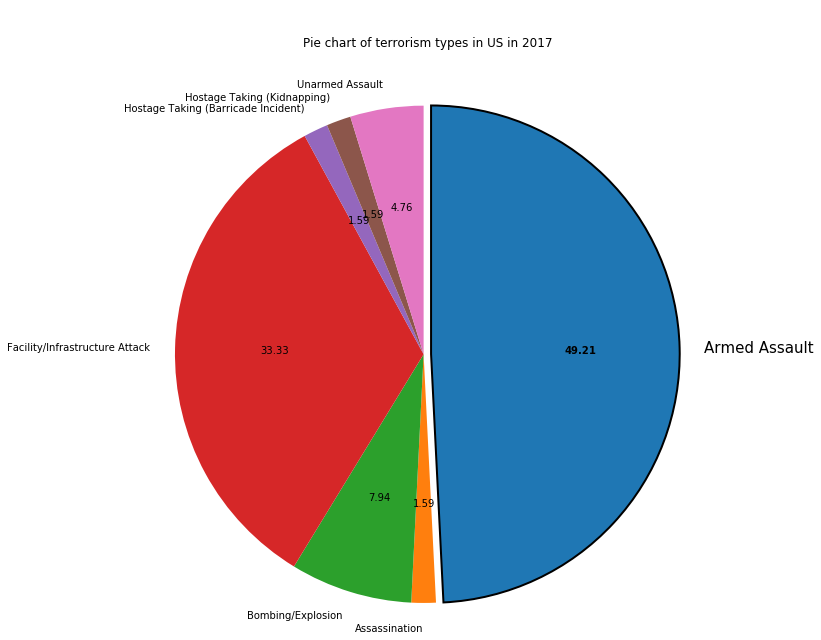

In [27]:

fig1, ax1 = plt.subplots(figsize=(10, 10))
explode=(0.03,0,0,0,0,0,0)
wedges, texts, autotexts = plt.pie(df_terrtype2017['count'],
       labels=df_terrtype2017['terrtype'],
       autopct = '%.2f',
       explode=explode,
        startangle=90,
       counterclock=False)
plt.axis('equal')

wedges[0].set(edgecolor='black', linewidth=2)
texts[0].set(family='cursive', size=15)
autotexts[0].set(weight='bold', size=10)
plt.title("\n\nPie chart of terrorism types in US in 2017\n\n")
plt.show()

Now analyzing armed assault in US over the years 1970-2017 since it is an interesting topic

In [28]:
df_terrtypearm = df_terrtype[df_terrtype['terrtype'] == 'Armed Assault']
df_terrtypearm = df_terrtypearm.dropna()
df_terrtypearm

,year,terrtype,count
0,1970,Armed Assault,28.0
1,1971,Armed Assault,21.0
2,1972,Armed Assault,3.0
3,1973,Armed Assault,22.0
4,1974,Armed Assault,14.0
5,1975,Armed Assault,3.0
6,1976,Armed Assault,8.0
7,1977,Armed Assault,8.0
8,1978,Armed Assault,8.0
9,1979,Armed Assault,10.0


Analyzing yearly data of armed assaults in US over 47 years.
Checking autocorrelation in this time series data to see how the series correlates to itself. 

The plot shows that when there is 1 time period lag (1 year), the data is quite correlated. So, the number of gun assualts in US in a particular year is a good prediction of number of gun assaults in the next year.


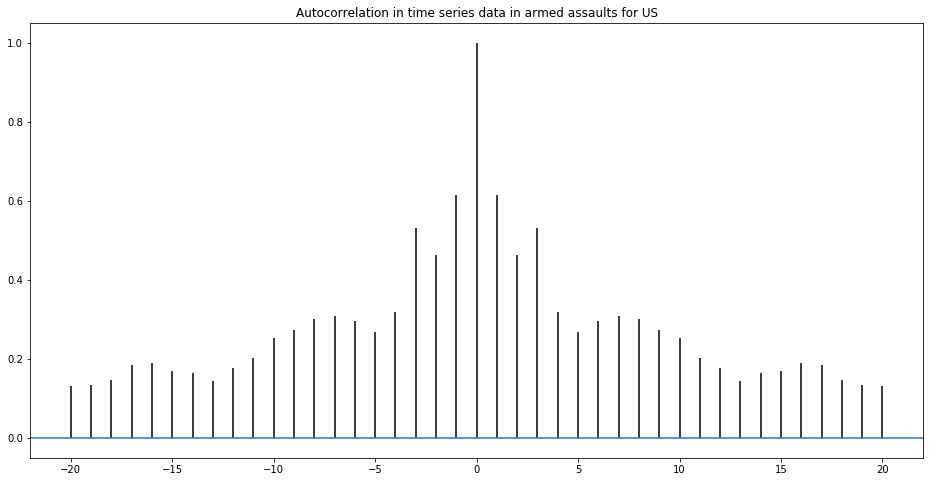

In [29]:
plt.figure(figsize=(16,8))
plt.acorr(df_terrtypearm['count'],maxlags=20)
plt.title("Autocorrelation in time series data in armed assaults for US")
plt.show()